<a href="https://colab.research.google.com/github/rafaignaulin/artificial_intelligence/blob/main/Atividade02_Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importa o knn
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
# importa o módulo de métricas
from sklearn.metrics import classification_report
from yellowbrick.classifier import ConfusionMatrix, roc_auc
# importa a função auxiliar para fazer a divisao dos dados
from sklearn.model_selection import train_test_split
# importa o encoder para transformar as classes em texto em números
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

from sklearn.tree import export_graphviz, plot_tree



In [119]:
#dftest = pd.read_csv('test.csv')
# df = pd.read_csv('train.csv')
# df_train = pd.concat([df, df1])

In [120]:
df_train = pd.read_csv('train.csv')

In [121]:
#Verificar se há valores nulos
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [122]:
df_train.drop('Cabin', axis=1, inplace=True)

In [123]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [124]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [125]:
df_train.loc[df_train.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,S


In [126]:
mean_age = df_train.groupby('Pclass')['Age'].mean()

In [127]:
mean_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [128]:
df_train['Age'] = df_train.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))


In [129]:
#df_train = df_train.loc[df_train.Embarked.isna() != True]

In [130]:
df_train.dropna(axis=0, inplace=True)

In [131]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

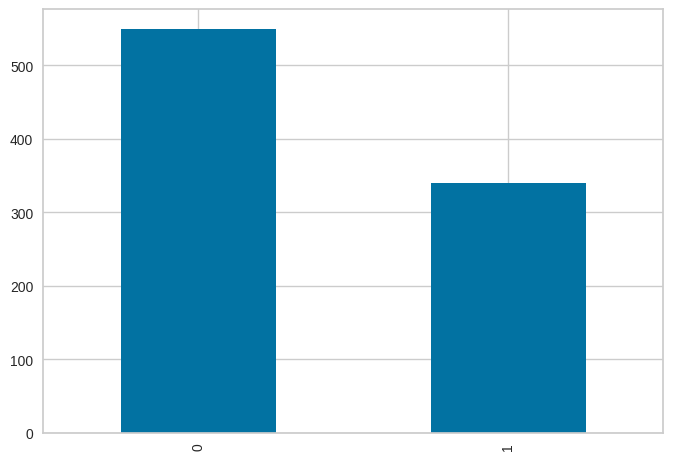

In [132]:
df_train.Survived.value_counts().plot(kind='bar')

# Os dados estão limpos, hora de aplicar os algoritmos

In [133]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C


In [134]:
df_train.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [135]:
# Nome , Ticket e Passenger ID nao importam

df_train.drop(['Name', 'PassengerId', 'Ticket'], inplace=True, axis=1)

In [136]:
le = LabelEncoder()

df_train.Sex = le.fit_transform(df_train.Sex)
df_train.Embarked = le.fit_transform(df_train.Embarked)

In [137]:
norm_scaler = MinMaxScaler()

df_normalized = pd.DataFrame(norm_scaler.fit_transform(df_train), columns=df_train.columns)
# df_normalized = pd.DataFrame(df_train)

In [138]:
df_normalized

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.0
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...
884,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0
885,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0
886,0.0,1.0,0.0,0.310639,0.125,0.333333,0.045771,1.0
887,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.0


In [139]:
y = df_train['Survived']
x = df_normalized.drop('Survived', axis=1)

In [140]:
X_train, X2, Y_train, Y2 = train_test_split(x, y, test_size=0.3, random_state=43)

In [141]:
X_validation, X_test, Y_validation, Y_test = train_test_split(X2, Y2, test_size=0.66, random_state=43) # 2/3 de 30%

In [142]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_validation.shape, Y_validation.shape

((622, 7), (622,), (177, 7), (177,), (90, 7), (90,))

#Busca de parametros


In [143]:
params = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1,100),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': np.arange(1,1000),
    'max_samples': np.arange(1,450),
    'min_impurity_decrease': np.arange(0.0, 1.0),
    'min_samples_leaf': np.arange(0, 1000),
    'min_samples_split': np.arange(0, 100),
    'min_weight_fraction_leaf': np.arange(0.0, 0.5),
    'n_estimators': np.arange(0, 10000),
  }

In [144]:
rf = RandomForestClassifier()

In [145]:
from sklearn.model_selection import KFold, RandomizedSearchCV, GridSearchCV

kfold= KFold(n_splits=5, shuffle=True, random_state=137)

In [146]:
CV = RandomizedSearchCV(
            rf,
            n_iter=20,
            cv=kfold,
            verbose=1,
            param_distributions= params )

In [ ]:
CV.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
CV.best_params_

In [ ]:
Y_pred = CV.predict(X_test)

print(classification_report(Y_test, Y_pred))

cm = ConfusionMatrix(CV)

cm.score(X_test, Y_test)

In [ ]:

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1,4),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': np.arange(2,3),
    'max_samples': np.arange(1,3),
    'min_samples_leaf': np.arange(1, 3),
    'min_samples_split': np.arange(2, 5),
    'n_estimators': np.arange(1, 5),
  }
CV = GridSearchCV(
            rf,
            cv=kfold,
            verbose=1,
            param_grid=params )

CV.fit(X_train, Y_train)

In [ ]:
CV.best_params_

In [ ]:
Y_pred = CV.predict(X_test)

print(classification_report(Y_test, Y_pred))

cm = ConfusionMatrix(CV)

cm.score(X_test, Y_test)

In [ ]:
from skopt import BayesSearchCV

params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': np.arange(1,10),
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': np.arange(2,50),
    'max_samples': np.arange(1,50),
    'min_samples_leaf': np.arange(1, 30),
    'min_samples_split': np.arange(2, 40),
    'n_estimators': np.arange(1, 20),
  }
CV = BayesSearchCV(
            rf,
            cv=kfold,
            n_iter=20,
            verbose=1,
            search_spaces=params )

CV.fit(X_train, Y_train)

In [ ]:
CV.best_params_

In [ ]:
Y_pred = CV.predict(X_test)

print(classification_report(Y_test, Y_pred))

cm = ConfusionMatrix(CV)

cm.score(X_test, Y_test)

In [ ]:

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=800)
axes = plot_tree(CV.estimators_[0], feature_names=X_train.columns, filled=True)

fig.show()

#Conclusões

Ambos os 3 algoritmos tiveram um resultado bom para predição de sobrevivencia no Titanic. O algoritmo de Random Forest foi o que mais obteve sucesso para predizer corretamente os valores. Porém, é o algoritmo que mais demanda recursos destes 3 selecionados. Outro ponto que notei, foi a diferença que a normalização e a tranformação dos dados fizeram na precisão e na otimização do modelo.